1.2.1 ПРИМЕР

 Задача: Необходимо разработать виртуальную модель процесса обучения. В программе должны быть объекты-ученики, учитель, кладезь знаний. Потребуется три класса – "учитель", "ученик", "данные". Учитель и ученик во многом похожи, оба – люди. Значит, их классы могут принадлежать одному надклассу "человек". Однако в контексте данной задачи у учителя и ученика вряд ли найдутся общие атрибуты. Определим, что должны уметь объекты для решения задачи "увеличить знания": • Ученик должен уметь брать информацию и превращать ее в свои знания. • Учитель должен уметь учить группу учеников. • Данные могут представлять собой список знаний. Элементы будут извлекаться по индексу.

In [65]:
class Data:
    def __init__(self, *info):    
        self.info = list(info)
    def __getitem__(self, i):
        return self.info [i]
class Teacher:
    def teach(self, info, *pupil):
        for i in pupil:
            i.take(info)
class Pupil:
    def __init__(self):
        self.knowledge = []
    def take(self, info):
        self. knowledge.append(info)


lesson = Data('class', 'object', 'inheritance', 'polymorphism', 'encapsulation')
marIvanna = Teacher()
vasy = Pupil()
pety = Pupil()
marIvanna.teach(lesson[2], vasy, pety)
marIvanna.teach(lesson[0], pety)
print(vasy.knowledge)
print(pety.knowledge)

['inheritance']
['inheritance', 'class']


1.2.2 Пример 

Задача: Напишите программу по следующему описанию. Есть класс "Воин". От него создаются два экземпляра-юнита. Каждому устанавливается здоровье в 100 очков. В случайном порядке они бьют друг друга. Тот, кто бьет, здоровья не теряет. У того, кого бьют, оно уменьшается на 20 очков от одного удара. После каждого удара надо выводить сообщение, какой юнит атаковал, и сколько у противника осталось здоровья. Как только у кого-то заканчивается ресурс здоровья, программа завершается сообщением о том, кто одержал победу.

In [66]:
import random
class Warrior:
    def __init__(self, health):
        self.health = health
    def hit(self, target, target1):
        if target.health > 0:
            target.health -= 20
        if target1 == warrior1:
            target1 = "Warrior1"
        if target1 == warrior2:
            target1 = "Warrior2"
        print(target1, " has attacked")
        print(target.health, " left")
        if target.health == 0:
            print(target1, " has won")
            
warrior1 = Warrior(100)
warrior2 = Warrior(100)
q = int(input("Enter 1 to attack. Enter 2 to stop program:"))
while q != 2:
    if q == 1:
        j = random.randint(1,3)
        if j % 2 == 0:
            warrior1.hit(warrior2,warrior1)
            q = int(input("Enter 1 to let some warrior attack:"))
        else:
            warrior2.hit(warrior1, warrior2)
            q = int(input("Enter 1 to let some warrior attack:"))
    else:
        print("Wrong input.")
        break

Warrior2  has attacked
80  left
Warrior1  has attacked
80  left
Warrior2  has attacked
60  left


1.2.3 ПРИМЕР 

Задача: Создайте класс по работе с дробями. В классе должна быть реализована следующая функциональность: сложение дробей; вычитание дробей; умножение дробей; деление дробей.

In [67]:
class Rational:
    @staticmethod
    def gcd(a,b):
        while (b != 0):
            (a,b) = (b, a%b)
        return a

    @staticmethod
    def sgn(x):
        if x>0:
            return 1
        elif x<0:
            return -1
        else:
            return 0
    def __init__(self,n,d):
        if n==0:
            self.num=0
            self.den=1
        else:
            z=self.sgn(n)*self.sgn(d)
            n=abs(n)
            d=abs(d)
            k=self.gcd(n, d)
            self.num=z*n//k
            self.den=d//k
    def __str__(self):
        if self.num==0:
            return "0"
        else:
            return str(self.num)+"/"+str(self.den)
    def __add__(self,o):
        n1=self.num
        d1=self. den
        if type(o)==int:
            n2=0
            d2=1
        else:
            n2=o.num
            d2=o.den
        n=n1*d2+n2*d1
        d=d1*d2
        return Rational(n,d)

    def __radd__(self,o):
        n1=self.num
        d1=self.den
        if type(o)==int:
            n2=0
            d2=1
        else:
            n2=o.num
            d2=o.den
        n=n1*d2+n2*d1
        d=d1*d2
        return Rational(n, d)
    def __sub__(self,o):
        n1=self.num
        d1=self. den
        n2=o.num
        d2=o.den
        n=n1*d2-n2*d1
        d=d1*d2
        return Rational(n, d)
    def __mul__(self,o):
        n1=self.num
        d1=self.den
        n2=o.num
        d2=o.den
        n=n1*n2
        d=d1*d2
        return Rational(n, d)
    def __floordiv__(self,o):
        n1=self.num
        d1=self.den
        n2=o.num
        d2=o.den
        n=n1*d2
        d=d1*n2
        return Rational(n, d)
d1=Rational(1,2)
d2=Rational(1,3)

d3=d1+d2
print(d3)
d4=d1-d2
print(d4)
d5=d1*d2
print(d5)
d6=d1*d2
print(d6)
d7=d1//d2
print(d7)
d8=6+d1
print(d8)

5/6
1/6
1/6
1/6
3/2
1/2


Задание 1 


Создайте класс по работе с тригонометрическими функциями. В классе
должны быть реализованы функции вычисления:
− косинуса;

− синуса;

− тангенса;

− арксинуса;

− арккосинуса;

− арктангенса;

− перевода из градусов в радианы.

In [68]:
import math as m 

class tr:
    def __init__(self,num):     #конструктор 
        self.num = num

    def meth(self):                 #косинус
        print(m.cos(self.num))

    def meth1(self):                #тангенс
        print(m.tan(self.num))

    def meth2(self):                #синус
        print(m.sin(self.num))

    def meth3(self):
        try:                        #арксинус
            print(m.asin(self.num))
        except BaseException:
            print(None)

    def meth4(self):
        try:                        #арккосинус
            print(m.acos(self.num))
        except BaseException:
            print(None)

    def meth5(self):
        try:                        #арктангенс
            m.atan(self.num)
        except BaseException:
            print(None)

    def meth6(self):                # из градусов в радианы
        print(m.radians(self.num))


t = tr(60)
t.meth()
t.meth1()
t.meth2()
t.meth3()
t.meth4()
t.meth5()
t.meth6()

-0.9524129804151563
0.320040389379563
-0.3048106211022167
None
None
1.0471975511965976


1.2.1 ПРИМЕР 

Задача: Определите класс бинарного дерева и задайте его объекты с отдельным атрибутом для каждого из потомков.

In [69]:
class Tree:
    def __init__(self, left, right):
        self.left = left
        self.right = right
t = Tree(Tree("a", "b"), Tree("c", "d"))
t.right.left

'c'

1.2.2 ПРИМЕР

Для обозначения отсутствующих потомков можно использовать None (в случае если у узла только один потомок). Само собой, можно комбинировать разные методы (например, использовать списки или множества потомков для каждого узла). Распространенный способ реализации деревьев, особенно на языках, не имеющих встроенной поддержки списков, это так называемое представление «первый потомок, следующий брат». В нем каждый узел имеет два «указателя» или атрибута, указывающих на другие узлы, как в бинарном дереве. Однако, первый из этих атрибутов ссылается на первого потомка узла, а второй — на его следующего брата (т.е. узел, имеющий того же родителя, но находящийся правее, — прим. перев). Иными словами, каждый узел дерева имеет указатель на связанный список его потомков, а каждый из этих потомков ссылается на свой собственный аналогичный список. Таким образом, небольшая модификация бинарного дерева даст нам многопутевое дерево, показанное в листинге ниже.

In [70]:
class Tree:
    def __init__(self, kids, next=None):
        self.kids = self.val = kids
        self.next = next

t = Tree(Tree("a", Tree("b", Tree("c", Tree("d")))))
t.kids.next.next.val

'c'

ЗАДАНИЕ 2

Представьте дерево показанное на рисунке с использованием списка из
списков. Выведите на печать корень дерева, а также его левое и правое
поддеревья.

In [71]:
T = ['a',
    [['b',
    [['d'],['e']]],
    ['с',['f']]]]

print (T[0])    #корень дерева
print (T[1][0]) #левое поддерево
print (T[1][1]) #правое поддерево

    

a
['b', [['d'], ['e']]]
['с', ['f']]


ЗАДАНИЕ 3 

Дан класс, описывающий бинарное дерево.

    Сlass Tree:

    def __init__(self, data):

        self.left = None

        self.right = None

        self.data = data

    def PrintTree(self):
    
        print(self.data)
 
Реализуйте в классе функцию для вставки нового элемента в дерево по
следующим правилам:

• Левое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.

• Правое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.

• Каждое из левого и правого поддеревьев также должно быть
бинарным деревом поиска.

• Не должно быть повторяющихся узлов.

Метод вставки сравнивает значение узла с родительским узлом и решает
куда доваить элемент (в левое или правое поддерево). Перепишите, метод
PrintTree для печати полной версии дерева

In [72]:
import random

class Tree:
    def __init__(self, data): #конструктор 
        self.left = None #левое поддерево
        self.right = None #правое поддерево
        self.data = data #значение узла

    def PrintTree(self): #вывод дерева по возрастанию , с левого узла до правого
        if self.left:
            self.left.PrintTree()

        print(self.data)

        if self.right:
            self.right.PrintTree()
        

    def insert(self,value): #втставка значения
        if value == self.data:
            return # если повторяется то ничего невозвращаем
        
        if value < self.data: # если новое значение меньше значения текущего узла
            if self.left is None: #если поддерево пустое
                self.left = Tree(value) #создаем узел в левом поддереве
            else:
                self.left.insert(value) # вызов вставки для левого поддерева
        else:
            if self.right is None: # Если правое поддерево пустое
                self.right = Tree(value) # Создаем новый узел в правом поддереве
            else:
                self.right.insert(value) # вызов вставки для правого поддерева

root = Tree(5)

root.insert(3)
root.insert(7)
root.insert(1)
root.insert(9)

root.PrintTree()

1
3
5
7
9


1.3.1 ПРИМЕР 

Задача: Построим дерево решений для задачи классификации, для этого, построим границу решения для каждого класса. В качестве данных будем использовать уже знакомый нам и встроенный в библиотеку sklearn набор данных ирисов Фишера. Импортируем библиотеки, набор данных и посмотрим его характеристики.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = sns.load_dataset('iris')
dataset
dataset.shape
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Далее, разделим наши данные на атрибуты и метки, а затем выделим в общей совокупности полученных данных обучающие и тестовые наборы. Таким образом, мы можем обучить наш алгоритм на одном наборе данных, а затем протестировать его на совершенно на другом наборе, который алгоритм еще не видел. Это дает вам более точное представление о том, как на самом деле будет работать ваш обученный алгоритм.

[Text(0.4, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.3, 0.7857142857142857, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.7857142857142857, 'x[2] <= 4.85\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.2, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3, 0.5, 'x[1] <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.133\nsamples = 42\nvalue = [0, 3, 39]'),
 Text(0.7, 0.5, 'x[2] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.6, 0.35714285714285715, 'x[0] <= 6.5\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.5, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.444\n

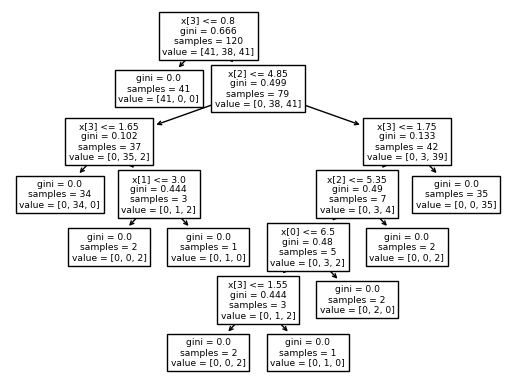

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:, :-1],
    dataset.iloc[:, -1],
    test_size = 0.20
)

X_train.shape, X_test.shape,y_train.shape, y_test.shape
X_train.head()
y_train. head()

#выполним классификацию
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
#построим дерево решений
from sklearn import tree
tree.plot_tree(classifier)

Теперь, когда наш классификатор обучен, давайте сделаем прогнозы по тестовым данным. Для составления прогнозов используется метод predict класса Decision Tree Classifier. Взгляните на следующий код для использования.

In [75]:
y_pred = classifier.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa'], dtype=object)

На данный момент мы обучили наш алгоритм и сделали некоторые прогнозы. Теперь посмотрим, насколько точен наш алгоритм. Для задач классификации обычно используются такие метрики, как матрица путаницы, точность. Библиотека Scikit-Learn metrics содержит методы classification_report и confusion_matrix, которые могут быть использованы для расчета этих метрик.

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.92      0.96        12
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Задание 4

Постройте классификатор на основе дерева принятия решений
следующего датасета:

*  X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

* target - [0, 0, 0, 1, 1, 1]

[[3 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



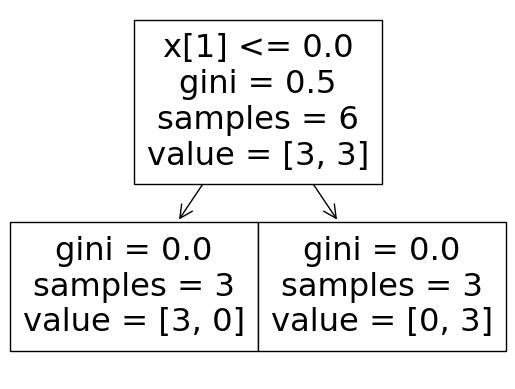

In [77]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#создаем набор данных
dataset = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

dataset.shape

#создаем классификатор дерева и обучаем его на данных с помощью fit
classifier = DecisionTreeClassifier()
classifier.fit(dataset,target)

#визуализируем дерево
tree.plot_tree(classifier)

#предсказания 
y_pred = classifier.predict(dataset)

print(confusion_matrix(y_pred,target)) #выводим матрицу ошибок
print(classification_report(y_pred,target)) # отчет о классификации

1.4.1 ПРИМЕР Задача: Постойте регрессию с использованием дерева решений, реализованного в Python.

(30, 2)


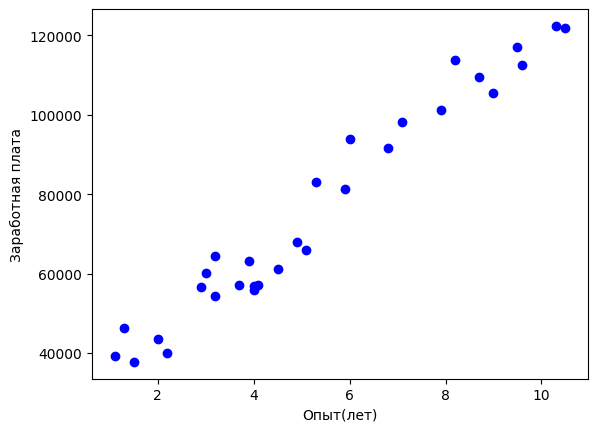

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


DecisionTreeRegressor()

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
dataset. head()

#Исследуем набор данных
print(dataset.shape)
dataset.describe()

# Нарисуем точечную диаграмму
plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "Заработная плата")
plt.xlabel("Опыт(лет)")
plt.ylabel("Заработная плата")
plt.show()

from sklearn.tree import DecisionTreeRegressor
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

array([ 46205. , 121872. ,  56375.5,  56375.5, 112635. , 105582. ])

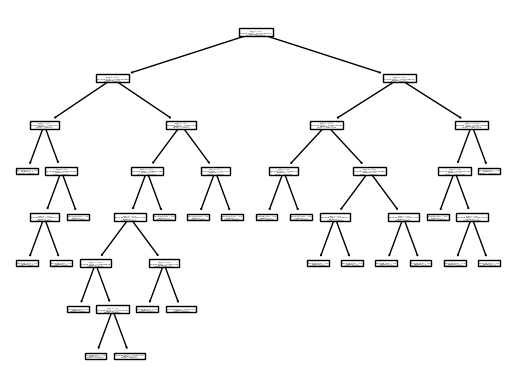

In [79]:
from sklearn import tree
tree.plot_tree(regressor)

#Построим прогноз:
y_pred = regressor.predict(X_test)
y_pred

#Теперь сравним некоторые из наших прогнозируемых значений с фактическими значениями:

In [80]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

#Расчитаем среднюю абсолютную и среднеквадратичную ошибку регрессии:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

Mean Squared Error: 25498988.416666668
Mean Absolute Error: 4120.666666666667


5.421715809463662

ЗАДАНИЕ 5 
Задание. Постройте модель регрессии для данных из предыдущей рабочей
тетради.Для примера можно взять потребления газа (в миллионах
галлонов) в 48 штатах США или набор данных о качестве красного вина:
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pet
rol_consumption.csv
https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv
Постройте прогноз. Оцените точность модели

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Считываем данные из файла
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
dataframe = pd.read_csv(url)
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [82]:
#Отделяем quality От других переменных
y =dataframe["quality"]
u = dataframe.drop(columns='quality') 
X = u

#добавляем две оси
X = np.c_[X, np.ones(X.shape[0])] 
y = np.c_[y]

# Производим разбиение выборки на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#создаем регрессор и обучаем дерево на тренировочных данных
regressor = DecisionTreeRegressor() 
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

[5. 6. 7. 5. 5. 6. 6. 6. 5. 6. 5. 5. 6. 4. 5. 5. 7. 5. 5. 6. 7. 5. 6. 7.
 5. 5. 6. 6. 5. 7. 5. 5. 5. 5. 7. 7. 6. 6. 6. 4. 5. 6. 7. 7. 6. 5. 5. 6.
 5. 5. 6. 5. 6. 6. 5. 5. 5. 5. 7. 6. 5. 6. 6. 6. 5. 6. 5. 5. 7. 6. 6. 6.
 5. 5. 6. 6. 5. 5. 5. 7. 6. 5. 7. 5. 6. 5. 7. 5. 5. 5. 5. 6. 7. 6. 6. 6.
 8. 4. 5. 6. 6. 5. 6. 6. 5. 5. 5. 6. 6. 5. 6. 5. 8. 5. 5. 6. 5. 6. 7. 6.
 5. 4. 5. 5. 6. 6. 5. 6. 6. 6. 5. 6. 7. 6. 6. 5. 6. 6. 6. 5. 6. 6. 5. 5.
 5. 6. 8. 6. 5. 5. 5. 5. 6. 5. 6. 6. 6. 6. 6. 5. 5. 6. 7. 5. 5. 5. 6. 6.
 6. 6. 6. 5. 5. 7. 6. 6. 7. 6. 7. 5. 4. 7. 5. 6. 4. 6. 6. 6. 5. 5. 6. 5.
 6. 6. 5. 6. 5. 6. 6. 5. 5. 6. 6. 6. 3. 5. 6. 7. 6. 6. 5. 6. 5. 7. 3. 6.
 6. 7. 6. 5. 5. 5. 7. 6. 5. 6. 7. 6. 6. 5. 5. 6. 6. 5. 6. 6. 6. 7. 7. 6.
 5. 6. 5. 5. 7. 6. 5. 5. 5. 6. 6. 6. 6. 5. 6. 5. 5. 5. 5. 7. 5. 6. 6. 6.
 6. 5. 5. 5. 5. 6. 5. 5. 5. 5. 7. 6. 6. 6. 6. 5. 5. 7. 5. 5. 6. 5. 5. 5.
 7. 6. 5. 6. 6. 6. 7. 6. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 6. 5. 6. 5. 5. 6.
 5. 4. 4. 5. 6. 6. 5. 7.]
     0
5.0  6
6.0  5
7.0 

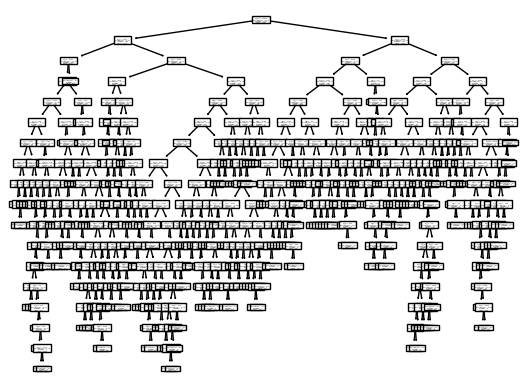

In [83]:
from sklearn import tree 
from sklearn import metrics 
#визуализируем дерево 
tree.plot_tree(regressor)

#делаем предсказание на тестовых данных
y_pred = regressor.predict(X_test)
print(y_pred)

#создаем датафрейм предсказанных данных и реальных
df=pd.DataFrame(y_test,y_pred)
print(df)

In [84]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print ('Avg Absolute Error:', metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100)

Mean Squared Error: 0.703125
Mean Absolute Error: 0.496875
Avg Absolute Error: 8.8160577563249
